### Data Preprocessing and Analysis for Weather Insight

##### I will work with the weather dataset. Let's start with loading the dataset.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
weather = pd.read_csv('weather2.csv')

We also use another dataset that contains information about each weather station.

In [5]:
stations = pd.read_excel('Station Information.xlsx')

1. Examine the shape of the both dataframes (1 points).

In [7]:
(weather.shape, stations.shape)

((100000, 14), (29745, 10))

2. Check the top 5 rows of each dataframe to see what they look like (1 points).

In [9]:
weather.head()

,Unnamed: 0,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
0,0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,-9999.0,300.0,51.0,7.0,-9999.0,-9999.0
1,1,841170-99999,2010.0,1.0,15.0,17.0,270.0,210.0,-9999.0,310.0,57.0,7.0,-9999.0,-9999.0
2,2,841170-99999,2010.0,1.0,15.0,18.0,276.0,208.0,10115.0,310.0,51.0,7.0,-9999.0,-9999.0
3,3,841170-99999,2010.0,1.0,15.0,19.0,280.0,220.0,-9999.0,320.0,62.0,7.0,-9999.0,-9999.0
4,4,841170-99999,2010.0,1.0,15.0,20.0,280.0,220.0,-9999.0,300.0,72.0,7.0,-9999.0,-9999.0


In [10]:
stations.head()

,USAF,WBAN,STATION NAME,CTRY,ST CALL,LAT,LON,ELEV(M),BEGIN,END
0,7018,99999,WXPOD 7018,NaN,NaN,0.00,0.000,7018.0,20110309,20130730
1,7026,99999,WXPOD 7026,AF,NaN,0.00,0.000,7026.0,20120713,20170822
2,7070,99999,WXPOD 7070,AF,NaN,0.00,0.000,7070.0,20140923,20150926
3,8260,99999,WXPOD8270,NaN,NaN,0.00,0.000,0.0,20050101,20100920
4,8268,99999,WXPOD8278,AF,NaN,32.95,65.567,1156.7,20100519,20120323


3. Drop the first column (Unnamed) from weather, then display the top row (1 points).

In [12]:
weather=weather.iloc[:, 1:]
weather.head(1)

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,-9999.0,300.0,51.0,7.0,-9999.0,-9999.0


4. Combine ``USAF`` and ``WBAN`` columns of ``stations`` ``DataFrame`` to create a new column named ``station_wban`` that looks like the one in ``weather`` ``DataFrame`` (``USAF_WBAN``) (1 points).

In [14]:
stations['station_wban'] = stations['USAF'].astype(str)+'-'+stations['WBAN'].astype(str)
stations.head()

,USAF,WBAN,STATION NAME,CTRY,ST CALL,LAT,LON,ELEV(M),BEGIN,END,station_wban
0,7018,99999,WXPOD 7018,NaN,NaN,0.00,0.000,7018.0,20110309,20130730,7018-99999
1,7026,99999,WXPOD 7026,AF,NaN,0.00,0.000,7026.0,20120713,20170822,7026-99999
2,7070,99999,WXPOD 7070,AF,NaN,0.00,0.000,7070.0,20140923,20150926,7070-99999
3,8260,99999,WXPOD8270,NaN,NaN,0.00,0.000,0.0,20050101,20100920,8260-99999
4,8268,99999,WXPOD8278,AF,NaN,32.95,65.567,1156.7,20100519,20120323,8268-99999


5. Join the 2 ``DataFrame``s to add ``station name``, country (``CTRY``) and state (``ST CALL``) to weather ``DataFrame``. There is no need for the rest of the columns in stations. You should use the proper type of join so that the number of rows in ``weather`` ``DataFrame`` stays the same. At the end of this part, the shape of ``weather`` should be (100000, 16). Check the first row of the result to make sure all values are correct  (1 points).

In [16]:
stations_subset = stations[['station_wban', 'STATION NAME', 'CTRY', 'ST CALL']]

# Perform a left join to add station information to the weather DataFrame
weather = weather.merge(
    stations_subset, 
    how='left', 
    on='station_wban'  # Join on the 'station_wban' column
)

# Check the shape of the resulting DataFrame to ensure it matches (100000, 16)
print("Shape of the updated weather DataFrame:", weather.shape)

# Display the first row of the updated weather DataFrame to verify the join
print("First row of the updated weather DataFrame:")
print(weather.head(1))

Shape of the updated weather DataFrame: (100000, 16)
First row of the updated weather DataFrame:
   station_wban    year  month   day  hour  temperature  dew_point  pressure  \
0  841170-99999  2010.0    1.0  15.0  16.0        270.0      210.0   -9999.0   

   wind_direction  wind_speed  sky_condition  precipitation_1h  \
0           300.0        51.0            7.0           -9999.0   

   precipitation_6h      STATION NAME CTRY ST CALL  
0           -9999.0  ELOY ALFARO INTL   EC    SEMT  


6. Show descriptive statistics for all numeric columns of ``weather`` ``DataFrame`` (1 points).

In [18]:
weather.describe()

,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000
mean,2009.34663,6.751760,15.871240,11.483780,136.975390,81.14740,5797.130830,23.626870,33.54303,-1839.430760,-4556.22822,-9511.991990
std,5.49655,3.392016,8.831961,6.926196,361.774103,362.78918,8303.764083,1264.655425,110.06946,3878.528361,4980.57331,2154.103991
min,1999.00000,1.000000,1.000000,0.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.00000,-9999.000000
25%,2005.00000,4.000000,8.000000,5.000000,61.000000,13.00000,10037.000000,70.000000,20.00000,0.000000,-9999.00000,-9999.000000
50%,2009.00000,7.000000,16.000000,11.000000,156.000000,99.00000,10140.000000,180.000000,31.00000,2.000000,-1.00000,-9999.000000
75%,2015.00000,10.000000,24.000000,17.000000,239.000000,178.00000,10189.000000,270.000000,46.00000,7.000000,0.00000,-9999.000000
max,2019.00000,12.000000,31.000000,23.000000,9999.000000,9999.00000,10449.000000,999.000000,999.00000,9.000000,2794.00000,1278.000000


7. In all numeric columns, values 9999, -9999, 999, and -999 represent missing values. Replace all of them with np.nan using <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html' target='blank'>.replace() </a> method of ``DataFrame`` (1 points).

In [20]:
weather = weather.replace([9999, -9999, 999,  -999], np.nan)
weather.head()

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,STATION NAME,CTRY,ST CALL
0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,NaN,300.0,51.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
1,841170-99999,2010.0,1.0,15.0,17.0,270.0,210.0,NaN,310.0,57.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
2,841170-99999,2010.0,1.0,15.0,18.0,276.0,208.0,10115.0,310.0,51.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
3,841170-99999,2010.0,1.0,15.0,19.0,280.0,220.0,NaN,320.0,62.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
4,841170-99999,2010.0,1.0,15.0,20.0,280.0,220.0,NaN,300.0,72.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT


8. Run descriptive statistics again to make sure the the values are transformed correctly (1 points).

In [22]:
weather.describe()

,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
count,100000.00000,100000.000000,100000.000000,100000.000000,99711.000000,99698.000000,78317.000000,97501.000000,99937.000000,81570.000000,54426.000000,4863.000000
mean,2009.34663,6.751760,15.871240,11.483780,144.152882,87.462597,10162.052505,173.352971,34.144951,4.149736,1.315621,15.559120
std,5.49655,3.392016,8.831961,6.926196,110.650054,108.562320,71.561724,112.883343,23.637969,3.341461,18.754512,50.480649
min,1999.00000,1.000000,1.000000,0.000000,-289.000000,-333.000000,9833.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2005.00000,4.000000,8.000000,5.000000,61.000000,14.000000,10121.000000,70.000000,20.000000,0.000000,0.000000,0.000000
50%,2009.00000,7.000000,16.000000,11.000000,156.000000,99.000000,10159.000000,180.000000,31.000000,4.000000,0.000000,0.000000
75%,2015.00000,10.000000,24.000000,17.000000,239.000000,178.000000,10204.000000,270.000000,46.000000,8.000000,0.000000,8.000000
max,2019.00000,12.000000,31.000000,23.000000,420.000000,280.000000,10449.000000,360.000000,175.000000,9.000000,2794.000000,1278.000000


9. All weather meaures are inflated with a factor of 10. For example, 289 for ``temperature`` means 28.9 degrees. Divide all measures by 10. Use ``.apply()`` method and a ``lambda function``. Other columns, such as day and hour should not be affected (1 points).

In [24]:
weather_measure_cols = ['temperature','dew_point','pressure','wind_direction','wind_speed','precipitation_1h','precipitation_6h']

weather[weather_measure_cols] = weather[weather_measure_cols].apply(lambda x: x / 10)

print(weather[weather_measure_cols].head())


   temperature  dew_point  pressure  wind_direction  wind_speed  \
0         27.0       21.0       NaN            30.0         5.1   
1         27.0       21.0       NaN            31.0         5.7   
2         27.6       20.8    1011.5            31.0         5.1   
3         28.0       22.0       NaN            32.0         6.2   
4         28.0       22.0       NaN            30.0         7.2   

   precipitation_1h  precipitation_6h  
0               NaN               NaN  
1               NaN               NaN  
2               NaN               NaN  
3               NaN               NaN  
4               NaN               NaN  


In [25]:
weather.head()

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,STATION NAME,CTRY,ST CALL
0,841170-99999,2010.0,1.0,15.0,16.0,27.0,21.0,NaN,30.0,5.1,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
1,841170-99999,2010.0,1.0,15.0,17.0,27.0,21.0,NaN,31.0,5.7,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
2,841170-99999,2010.0,1.0,15.0,18.0,27.6,20.8,1011.5,31.0,5.1,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
3,841170-99999,2010.0,1.0,15.0,19.0,28.0,22.0,NaN,32.0,6.2,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
4,841170-99999,2010.0,1.0,15.0,20.0,28.0,22.0,NaN,30.0,7.2,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT


10. Calculate mean, max, and min values for each measure of weather for each month. In your output, replace month number with month names (15 points).

In [27]:
import calendar
 
# Group by month and calculate mean, max, and min for each weather measure
monthly_measures = weather.groupby('month')[weather_measure_cols].agg(['mean', 'max', 'min'])
 
# Replace month number with month names
monthly_measures.index = monthly_measures.index.map(lambda x: calendar.month_name[int(x)])
 
# Display the result
print(monthly_measures)

          temperature              dew_point                 pressure          \
                 mean   max   min       mean   max   min         mean     max   
month                                                                           
January      6.927011  32.0 -28.3   3.043203  26.2 -33.3  1018.083328  1044.9   
February     8.038640  32.0 -28.9   2.755169  27.0 -32.2  1017.459004  1044.5   
March        8.890249  32.5 -18.9   2.228474  26.0 -26.7  1014.822810  1040.4   
April       11.235925  41.0 -12.8   3.752994  26.0 -22.2  1015.871173  1041.5   
May         16.960399  36.0  -1.1  10.094536  26.0  -9.4  1014.805513  1030.2   
June        21.231470  42.0   5.0  14.314140  28.0  -5.0  1013.896069  1028.9   
July        21.941066  40.6   0.0  16.684922  27.0  -2.0  1016.134597  1031.1   
August      22.071835  42.0   0.0  16.550161  27.0  -2.8  1015.136875  1025.5   
September   20.016636  36.7  -2.2  14.520187  26.1 -10.0  1015.307790  1030.3   
October     13.234213  34.0 

11. Draw separate histograms for ``temperature``, ``dew point``, ``pressure``, and ``wind speed`` in one figure. Use subplots. Each plot should be labeled using corrosponding measure name. Explain how each distribution is (skewed right, skewed left, normal) (20 points).

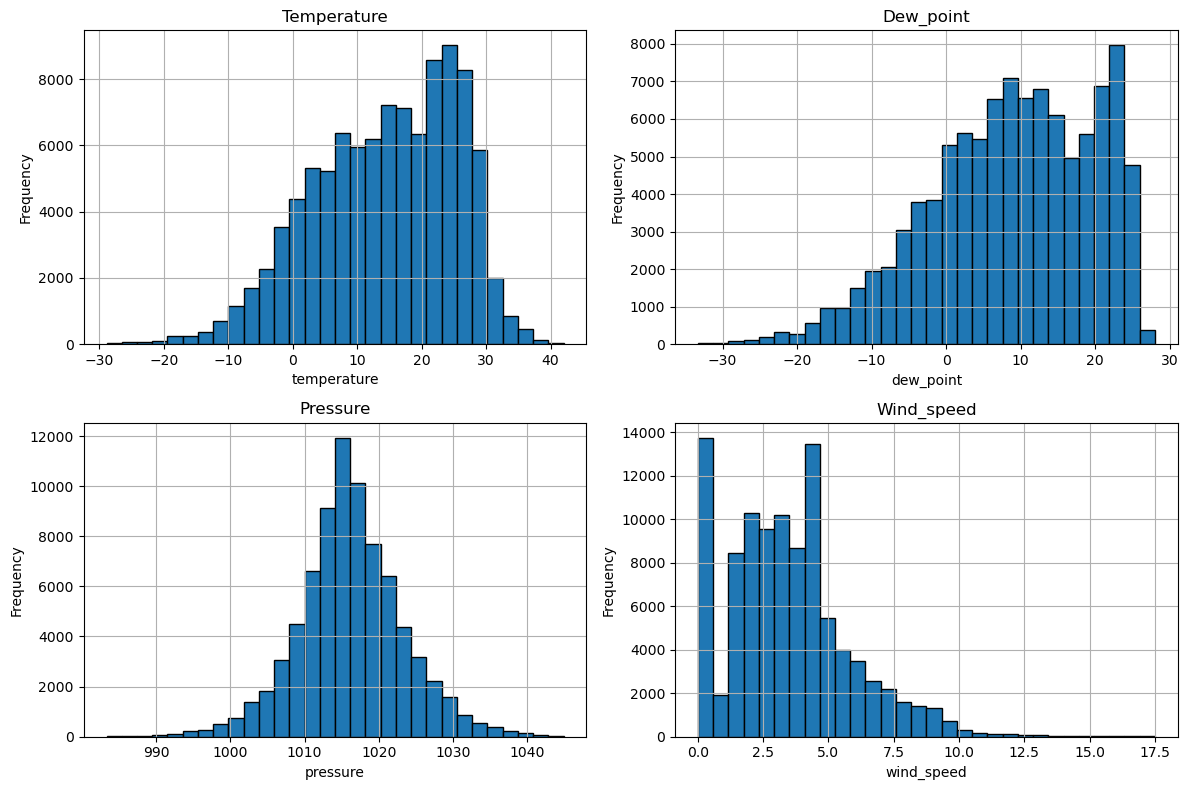

In [29]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['temperature', 'dew_point', 'pressure', 'wind_speed']):
    plt.subplot(2, 2, i+1)
    weather[col].hist(bins=30, edgecolor='black')
    plt.title(col.capitalize())
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

##### (1.)The histogram for temperature is right-skewed, meaning it has a longer tail on the right side. This suggests that while most temperature values are clustered around a lower to middle range, there are occasional higher values (outliers) pulling the distribution towards the right.This could indicate that the majority of temperatures recorded are in a moderate to low range, but during extreme weather events, such as heatwaves, the temperature spikes significantly.
##### (2.)Like the temperature, the dew point also shows a right-skewed distribution. Dew point is a measure of moisture in the air, and its right skewness indicates that while most dew points are clustered in lower ranges, there are occasional spikes with very high moisture content.High dew points can occur during periods of high humidity, especially in tropical or coastal regions, leading to discomfort. These high moisture levels are less frequent but still significant.
##### (3.)The wind speed histogram is left-skewed, meaning most values are concentrated on the higher side, with a few low wind speeds pulling the distribution to the left. This suggests that, on average, the weather has moderate to high wind speeds, but occasional calm or very low wind speeds are less frequent.
##### (4.)The pressure distribution appears to be roughly normal, meaning it follows a bell-shaped curve, with the majority of data points clustering around the mean, and fewer points appearing at the extremes (high and low pressures).


12. Draw a bar chart that shows average ``temperature`` for different months. Replace month number with month name and format month labels in a way that is readable by rotating them 30 degrees (20 points).

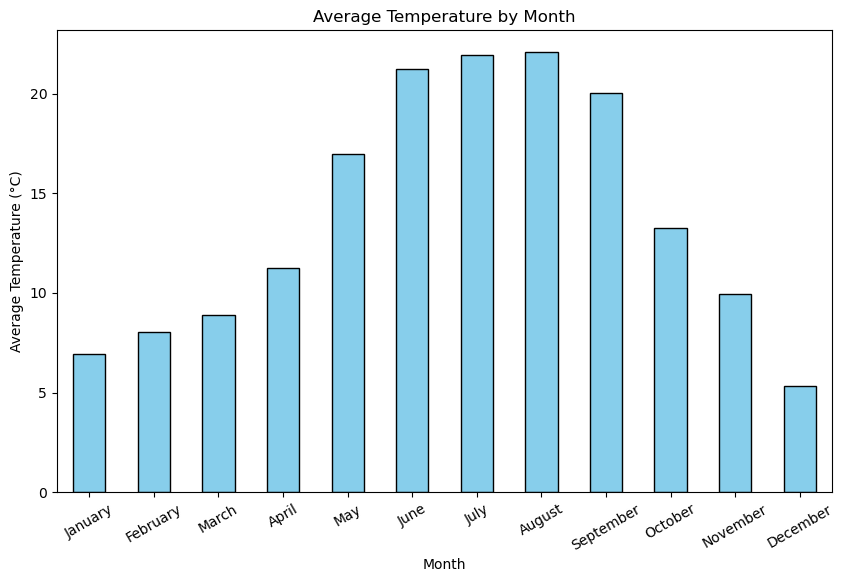

In [32]:
monthly_avg_temp = weather.groupby('month')['temperature'].mean()
 
# Map month numbers (1-12) to month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_temp.index = month_names
 
# Plot the bar chart
plt.figure(figsize=(10, 6))
monthly_avg_temp.plot(kind='bar', color='skyblue', edgecolor='black')
 
# Rotate the x-axis labels for better readability
plt.xticks(rotation=30)
 
# Add title and labels
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
 
# Show the plot
plt.show()


13. Plot a line chart that shows average ``temperature`` over time. The x-axis should contain a label for every other year (15 points).

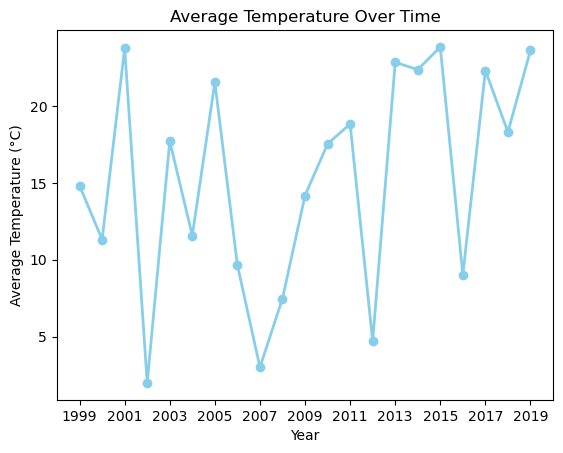

In [34]:
# Group by 'year' and calculate the average temperature
yearly_avg_temp = weather.groupby('year')['temperature'].mean()
 
# Plot the line chart
plt.plot(yearly_avg_temp.index, yearly_avg_temp.values, marker='o', color='skyblue', linestyle='-', linewidth=2)
 
# Set the x-axis labels for every other year
plt.xticks(yearly_avg_temp.index[::2])  # Select every other year for labels
 
# Add title and labels
plt.title('Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
 
# Show the plot
plt.show()

14. Select the top 10 stations that have the most number of records. Draw a bar chat that shows the number of records for each of the 10 station (20 points).

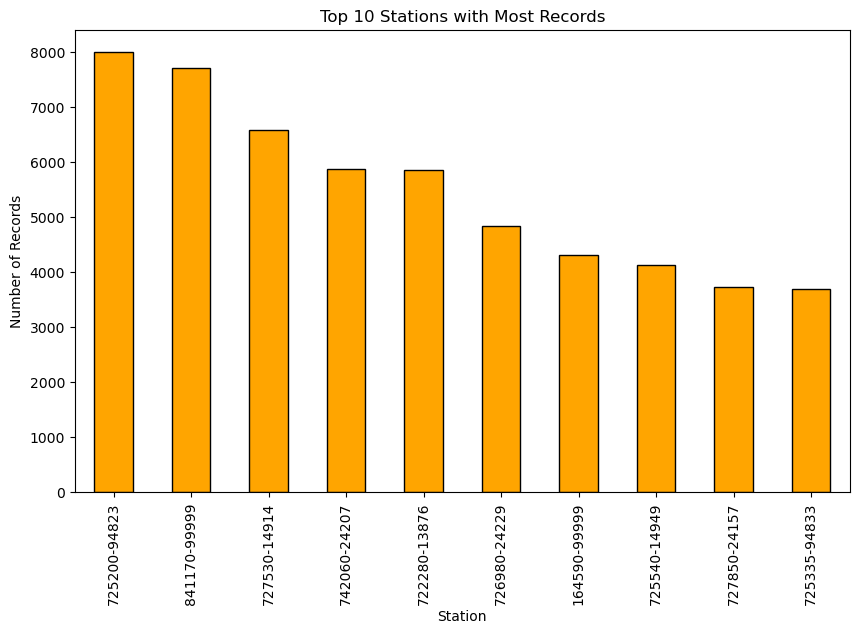

In [36]:
top_10_stations = weather['station_wban'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_stations.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 10 Stations with Most Records")
plt.xlabel("Station")
plt.ylabel("Number of Records")
plt.show()

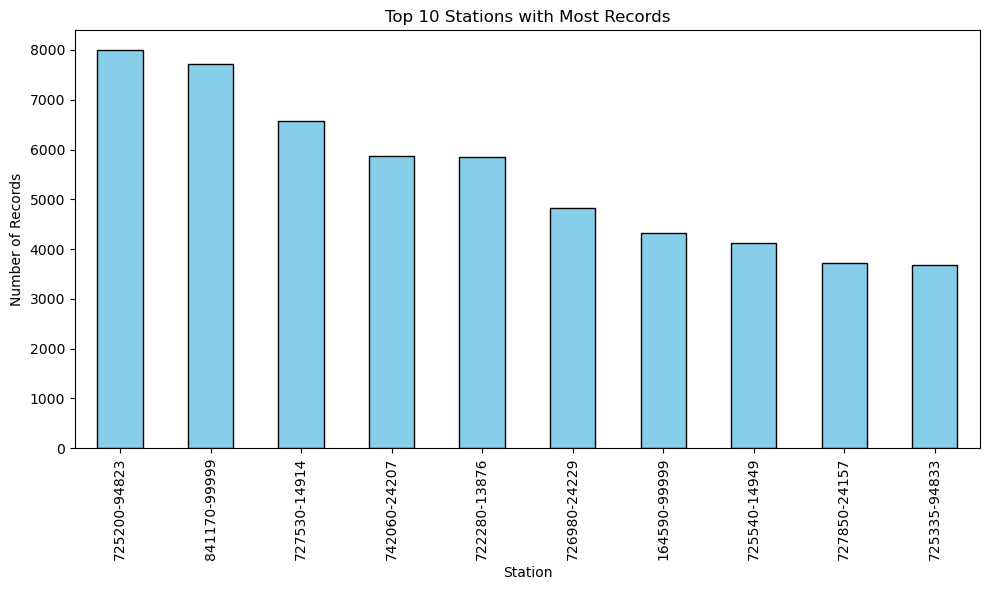

In [37]:


# Count the number of records for each station
station_record_counts = weather['station_wban'].value_counts()

# Select the top 10 stations with the most records
top_10_stations = station_record_counts.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_10_stations.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Top 10 Stations with Most Records")
plt.xlabel("Station")
plt.ylabel("Number of Records")

# Show the plot
plt.tight_layout()
plt.show()


15. Add a new column named ``season`` which is calculated based on month. Use Jun-Aug for summer, Dec-Feb for winter and so on (15 points).

In [39]:

def col_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

weather['season'] = weather['month'].apply(col_season)

In [40]:
weather.head(10)

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,STATION NAME,CTRY,ST CALL,season
0,841170-99999,2010.0,1.0,15.0,16.0,27.0,21.0,NaN,30.0,5.1,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,Winter
1,841170-99999,2010.0,1.0,15.0,17.0,27.0,21.0,NaN,31.0,5.7,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,Winter
2,841170-99999,2010.0,1.0,15.0,18.0,27.6,20.8,1011.5,31.0,5.1,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,Winter
3,841170-99999,2010.0,1.0,15.0,19.0,28.0,22.0,NaN,32.0,6.2,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,Winter
4,841170-99999,2010.0,1.0,15.0,20.0,28.0,22.0,NaN,30.0,7.2,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,Winter
5,841170-99999,2010.0,1.0,15.0,21.0,27.0,23.0,NaN,31.0,6.2,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,Winter
6,841170-99999,2010.0,1.0,15.0,22.0,27.0,23.0,NaN,30.0,3.6,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,Winter
7,841170-99999,2010.0,1.0,15.0,23.0,28.0,20.0,NaN,23.0,2.1,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,Winter
8,841170-99999,2010.0,1.0,16.0,0.0,26.9,21.4,1008.1,19.0,3.6,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,Winter
9,841170-99999,2010.0,1.0,16.0,2.0,26.0,22.0,NaN,22.0,2.1,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,Winter


16. For the top 10 stations calculated in previous steps, draw a bar chart that shows average ``temperature`` for each season for each station (15 points).

<Figure size 1500x800 with 0 Axes>

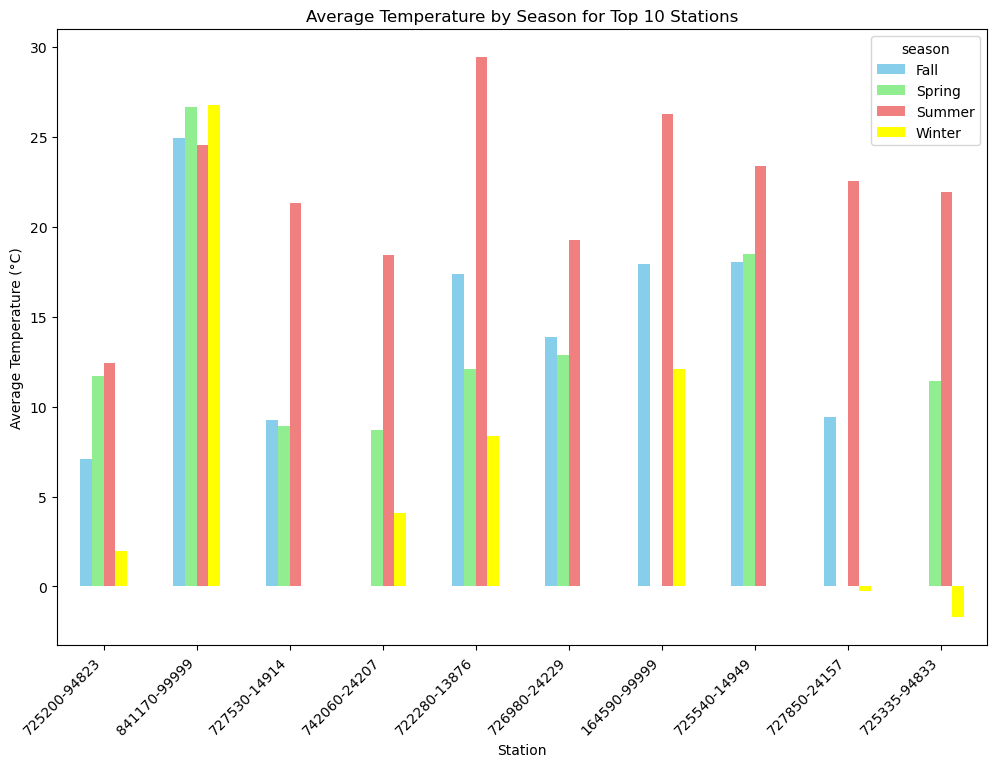

In [42]:
plt.figure(figsize=(15,8))

# 1. Group by 'station_wban' and 'season' to calculate the average temperature
season_avg_temp = weather.groupby(['station_wban', 'season'])['temperature'].mean().unstack()
 
# 2. Filter for the top 10 stations
top_10_stations = weather['station_wban'].value_counts().head(10).index
season_avg_temp = season_avg_temp.loc[top_10_stations]
 
# 3. Plot the bar chart
season_avg_temp.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'lightgreen', 'lightcoral', 'yellow'])
 
# 4. Add titles and labels
plt.title('Average Temperature by Season for Top 10 Stations')
plt.xlabel('Station')
plt.ylabel('Average Temperature (°C)')
 
# 5. Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
 
# 6. Show the plot
plt.show()

17. Draw a pair plot of all weather measures. Put season on color (10 points).

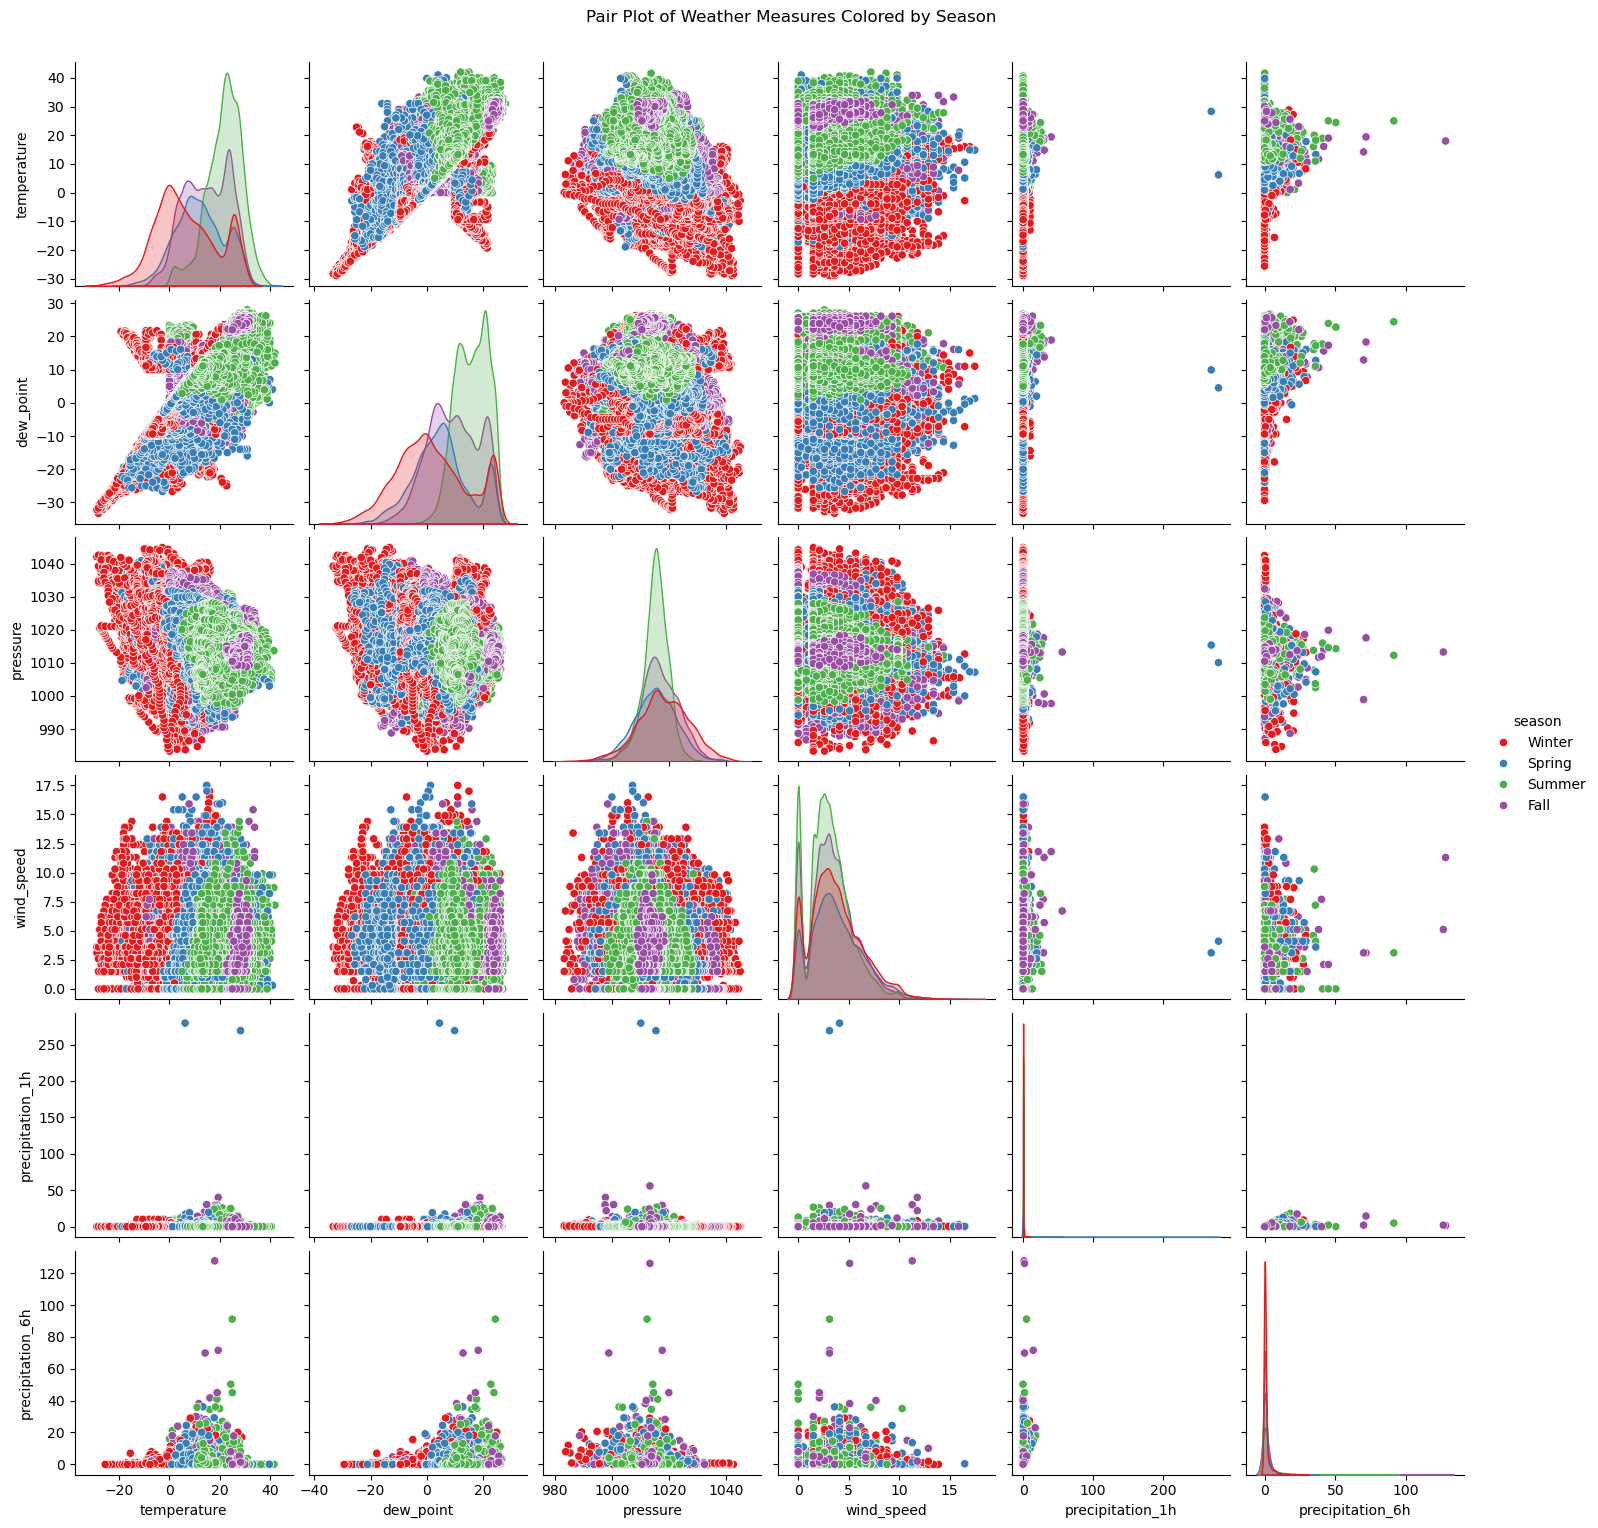

In [44]:
17 # Select a few key weather measures for the pairplot (temperature, wind speed, and pressure)
weather_measures_ = ['temperature', 'dew_point', 'pressure', 'wind_speed', 'precipitation_1h', 'precipitation_6h']
 
# Create a pair plot using seaborn, color points by 'season'
sns.pairplot(weather[weather_measures_ + ['season']], hue='season', palette="Set1")
 
# Add a title for the plot
plt.suptitle('Pair Plot of Weather Measures Colored by Season', y=1.02)
 
# Show the plot
plt.show()

18. Based on what you see above, which columns contain outliers? (10 points)

In [46]:
weather_columns = ['temperature', 'dew_point', 'pressure', 'wind_speed', 'precipitation_1h', 'precipitation_6h']
 
# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outlier_info = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_info[col] = {
            "Lower Bound": lower_bound, 
            "Upper Bound": upper_bound, 
            "Outliers": outliers[col].tolist()  # List of detected outliers for each column
        }
    return outlier_info
 
# Detecting outliers for specified columns
outliers_detected = detect_outliers_iqr(weather, weather_columns)
 
# Displaying results in a more readable format
outliers_df = pd.DataFrame(outliers_detected).transpose()
print(outliers_df)

                 Lower Bound Upper Bound  \
temperature            -20.6        50.6   
dew_point              -23.2        42.4   
pressure              999.65     1032.85   
wind_speed              -1.9         8.5   
precipitation_1h         0.0         0.0   
precipitation_6h        -1.2         2.0   

                                                           Outliers  
temperature       [-20.6, -21.7, -21.7, -21.7, -21.7, -21.7, -21...  
dew_point         [-24.4, -25.6, -26.7, -26.7, -26.7, -26.7, -26...  
pressure          [1033.1, 1033.2, 1033.1, 1032.9, 1033.5, 1034....  
wind_speed        [8.7, 8.8, 9.3, 8.8, 8.8, 8.8, 9.3, 8.8, 9.3, ...  
precipitation_1h  [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0....  
precipitation_6h  [17.0, 20.1, 18.0, 7.1, 6.1, 4.6, 14.7, 2.5, 1...  


19. Exclude all outliers and store the result in a new ``DataFrame`` named ``weather_no_outlier``. Make sure you don't end up with too few records by excluding missing values. Check the shape of your ``DataFrame`` after filtering to make sure you retained most of your data (15 points).

In [48]:
# Create a mask for outliers based on the pre-calculated bounds (from previous step)
mask = np.ones(len(weather), dtype=bool)  # Start by keeping all rows
 
# Loop through each column to filter out outliers based on the pre-calculated bounds
for col in weather_columns:
    lower_bound = outliers_detected[col]["Lower Bound"]
    upper_bound = outliers_detected[col]["Upper Bound"]
 
    # Update the mask: Exclude rows where the value is an outlier in this column
    mask &= (weather[col] >= lower_bound) & (weather[col] <= upper_bound)
 
# Retain rows with missing values (NaN) in any of the columns
mask |= weather.isnull().any(axis=1)  # Keep rows where any column is NaN
 
# Apply the mask to the DataFrame to exclude outlier rows but keep NaN rows
weather_no_outlier = weather[mask]
 
# Check the shape of the filtered DataFrame
print(f"Original shape: {weather.shape}")
print(f"Shape after excluding outliers (with missing values kept): {weather_no_outlier.shape}")

Original shape: (100000, 17)
Shape after excluding outliers (with missing values kept): (98408, 17)


20. Rerun the pair plot to see how it changed after outlier removal (1 points).

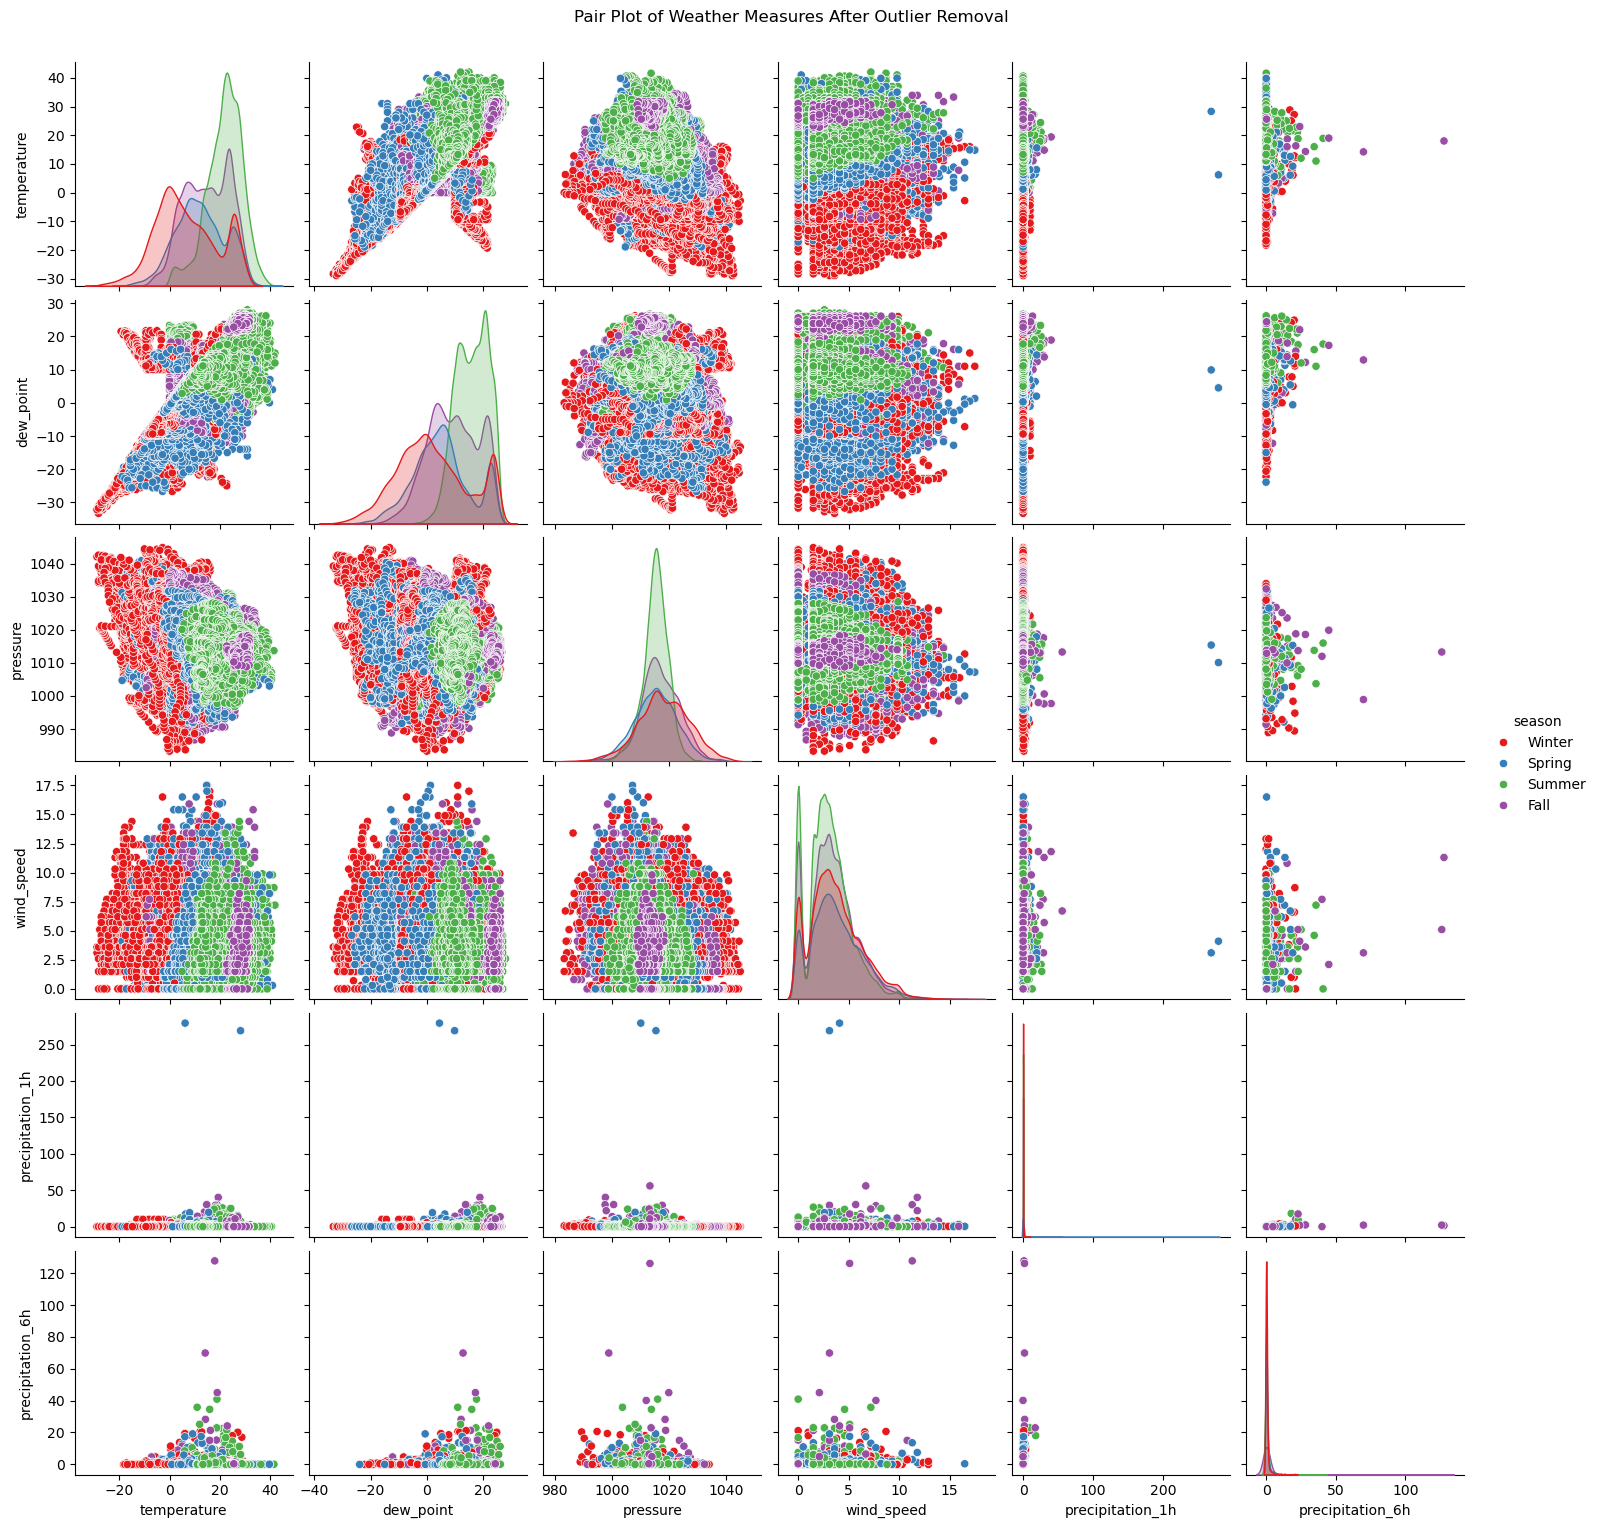

In [50]:
# Define weather measures to plot
weather_measures = ['temperature', 'dew_point', 'pressure', 'wind_speed', 'precipitation_1h', 'precipitation_6h']
 
# Create the pair plot with the hue based on the 'season' column
sns.pairplot(weather_no_outlier[weather_measures + ['season']], hue='season', palette="Set1")
 
# Add a title for the plot
plt.suptitle('Pair Plot of Weather Measures After Outlier Removal', y=1.02)
 
# Show the plot
plt.show()

21. Do any two of these measures seem to be related? (10 points)

Temperature vs. Dew Point (Strong Positive Correlation):
In the pair plot, you can see a clear upward trend in the scatter plot for temperature and dew point, indicating that as the temperature increases, the dew point tends to increase as well. The points are clustered tightly along a diagonal line, which suggests a strong linear relationship.

This relationship occurs because dew point reflects the amount of moisture in the air, and warmer air can hold more moisture. Hence, higher temperatures generally lead to higher dew points if sufficient moisture is available in the atmosphere.

Seasonal Variation: While the relationship holds across seasons, the range of dew point and temperature varies. For instance, in summer (green points), both temperature and dew point are higher, while in winter (blue points), both tend to be lower, but the positive correlation persists.

This strong correlation can be used to estimate dew point if the temperature and relative humidity are known.
2. Temperature vs. Pressure (Weak Negative Relationship):
Observation: The scatter plot for temperature and pressure shows a slight downward trend, suggesting that higher temperatures may correspond to lower atmospheric pressure, but the relationship is not strong. The data points are more scattered compared to the temperature-dew point relationship.

Reason: Temperature and atmospheric pressure are indirectly related because:

Warmer air tends to expand, becoming less dense, which can lead to a decrease in surface pressure in some cases.
Conversely, higher pressure systems are often associated with cooler, denser air masses.
Seasonal Variation: This weak inverse relationship might become more noticeable in specific weather patterns, like during the summer when lower pressures are associated with heat-induced storms or in winter when high-pressure systems bring cold air.

Implications:

While the trend is weak, it can be useful in meteorological studies to understand how temperature and pressure interact in different weather systems.
This relationship might have exceptions based on local geographical or seasonal phenomena, such as monsoons or high-pressure winter systems.

22. Below write anything the catches your eye in the charts above (10 points).

23. Replace all missing values with the value from the previous record (15 points).

In [55]:
weather = weather.fillna(method='ffill')

# Check for missing values after filling
missing_values_after = weather.isnull().sum()
print(missing_values_after)

station_wban           0
year                   0
month                  0
day                    0
hour                   0
temperature            0
dew_point              0
pressure               2
wind_direction         0
wind_speed             0
sky_condition          0
precipitation_1h    3856
precipitation_6h     117
STATION NAME           0
CTRY                   0
ST CALL                0
season                 0
dtype: int64


C:\Users\aditi\AppData\Local\Temp\ipykernel_25564\3168230364.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather = weather.fillna(method='ffill')


24. Replace the remaining missing values with the value from the next record (15 points).

In [57]:
weather = weather.fillna(method='bfill')

# Check for missing values after filling
missing_values_after = weather.isnull().sum()
print(missing_values_after)


C:\Users\aditi\AppData\Local\Temp\ipykernel_25564\1116000720.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather = weather.fillna(method='bfill')


station_wban        0
year                0
month               0
day                 0
hour                0
temperature         0
dew_point           0
pressure            0
wind_direction      0
wind_speed          0
sky_condition       0
precipitation_1h    0
precipitation_6h    0
STATION NAME        0
CTRY                0
ST CALL             0
season              0
dtype: int64


25. Are there any missing values left? If yes, replace them with the mean of the station (10 points).

#for col in weather.select_dtypes(include=['float64', 'int64']).columns:
   #weather[col] = weather.groupby('station_wban')[col].transform(lambda x: x.fillna(x.mean()))
######After applying both forward and backward filling techniques, all missing values were handled. These steps ensure that the dataset is now complete and free of any NaN values. As a result, when we now check for missing values,there are no NaN values left in the dataset.

Since there are no missing values left, there's no need to proceed with replacing them with the mean of each station. The dataset is now ready for further analysis and processing.#####

In [60]:
weather_no_outlier.isnull().sum()

station_wban            0
year                    0
month                   0
day                     0
hour                    0
temperature           289
dew_point             302
pressure            21683
wind_direction       2499
wind_speed             63
sky_condition       18430
precipitation_1h    45574
precipitation_6h    95137
STATION NAME            0
CTRY                    0
ST CALL                 0
season                  0
dtype: int64

26. Create a new ``DataFrame`` named ``normalized_df`` that contains normalized values of all measures of ``weather`` ``DataFrame``. ``normalized_df`` must contain the same columns as ``weather`` but all weather measures are normalized (10 points).

In [62]:
from sklearn.preprocessing import MinMaxScaler

# List of weather measures to normalize
weather_measures = ['temperature', 'dew_point', 'pressure', 'wind_speed', 'precipitation_1h', 'precipitation_6h']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Create a new DataFrame to store normalized values
normalized_df = weather.copy()

# Apply the scaler to normalize the weather measures
normalized_df[weather_measures] = scaler.fit_transform(normalized_df[weather_measures])

# Check the first few rows of the new DataFrame
print(normalized_df.head())


   station_wban    year  month   day  hour  temperature  dew_point  pressure  \
0  841170-99999  2010.0    1.0  15.0  16.0     0.788434   0.885808  0.457792   
1  841170-99999  2010.0    1.0  15.0  17.0     0.788434   0.885808  0.457792   
2  841170-99999  2010.0    1.0  15.0  18.0     0.796897   0.882545  0.457792   
3  841170-99999  2010.0    1.0  15.0  19.0     0.802539   0.902121  0.457792   
4  841170-99999  2010.0    1.0  15.0  20.0     0.802539   0.902121  0.457792   

   wind_direction  wind_speed  sky_condition  precipitation_1h  \
0            30.0    0.291429            7.0          0.000358   
1            31.0    0.325714            7.0          0.000358   
2            31.0    0.291429            7.0          0.000358   
3            32.0    0.354286            7.0          0.000358   
4            30.0    0.411429            7.0          0.000358   

   precipitation_6h      STATION NAME CTRY ST CALL  season  
0          0.016419  ELOY ALFARO INTL   EC    SEMT  Winter  


27. In ``normalized_df``, convert all categorical varaibles, except for ``station_wban``, to dummies (10 points).

In [64]:
# Select categorical columns (excluding 'station_wban')
categorical_columns = normalized_df.select_dtypes(include=['object']).columns

# Exclude 'station_wban' from categorical columns to avoid converting it to dummies
categorical_columns = categorical_columns[categorical_columns != 'station_wban']

# Create dummy variables for categorical columns
normalized_df = pd.get_dummies(normalized_df, columns=categorical_columns, drop_first=True ,dtype=int)

# Check the first few rows of the updated DataFrame
print(normalized_df.head())


   station_wban    year  month   day  hour  temperature  dew_point  pressure  \
0  841170-99999  2010.0    1.0  15.0  16.0     0.788434   0.885808  0.457792   
1  841170-99999  2010.0    1.0  15.0  17.0     0.788434   0.885808  0.457792   
2  841170-99999  2010.0    1.0  15.0  18.0     0.796897   0.882545  0.457792   
3  841170-99999  2010.0    1.0  15.0  19.0     0.802539   0.902121  0.457792   
4  841170-99999  2010.0    1.0  15.0  20.0     0.802539   0.902121  0.457792   

   wind_direction  wind_speed  ...  ST CALL_VA KLFI  ST CALL_VA KRIC  \
0            30.0    0.291429  ...                0                0   
1            31.0    0.325714  ...                0                0   
2            31.0    0.291429  ...                0                0   
3            32.0    0.354286  ...                0                0   
4            30.0    0.411429  ...                0                0   

   ST CALL_VT KBTV  ST CALL_WA KGEG  ST CALL_WA KTCM  ST CALL_WSAP  \
0               

28. Check the head of ``normalized_df`` (5 points).

In [66]:
normalized_df.head()

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,...,ST CALL_VA KLFI,ST CALL_VA KRIC,ST CALL_VT KBTV,ST CALL_WA KGEG,ST CALL_WA KTCM,ST CALL_WSAP,ST CALL_WSSS,season_Spring,season_Summer,season_Winter
0,841170-99999,2010.0,1.0,15.0,16.0,0.788434,0.885808,0.457792,30.0,0.291429,...,0,0,0,0,0,0,0,0,0,1
1,841170-99999,2010.0,1.0,15.0,17.0,0.788434,0.885808,0.457792,31.0,0.325714,...,0,0,0,0,0,0,0,0,0,1
2,841170-99999,2010.0,1.0,15.0,18.0,0.796897,0.882545,0.457792,31.0,0.291429,...,0,0,0,0,0,0,0,0,0,1
3,841170-99999,2010.0,1.0,15.0,19.0,0.802539,0.902121,0.457792,32.0,0.354286,...,0,0,0,0,0,0,0,0,0,1
4,841170-99999,2010.0,1.0,15.0,20.0,0.802539,0.902121,0.457792,30.0,0.411429,...,0,0,0,0,0,0,0,0,0,1
